<a href="https://colab.research.google.com/github/yankyerajoseph/yankyerajoseph/blob/main/Appendix_3_Two_phase_kinetic_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


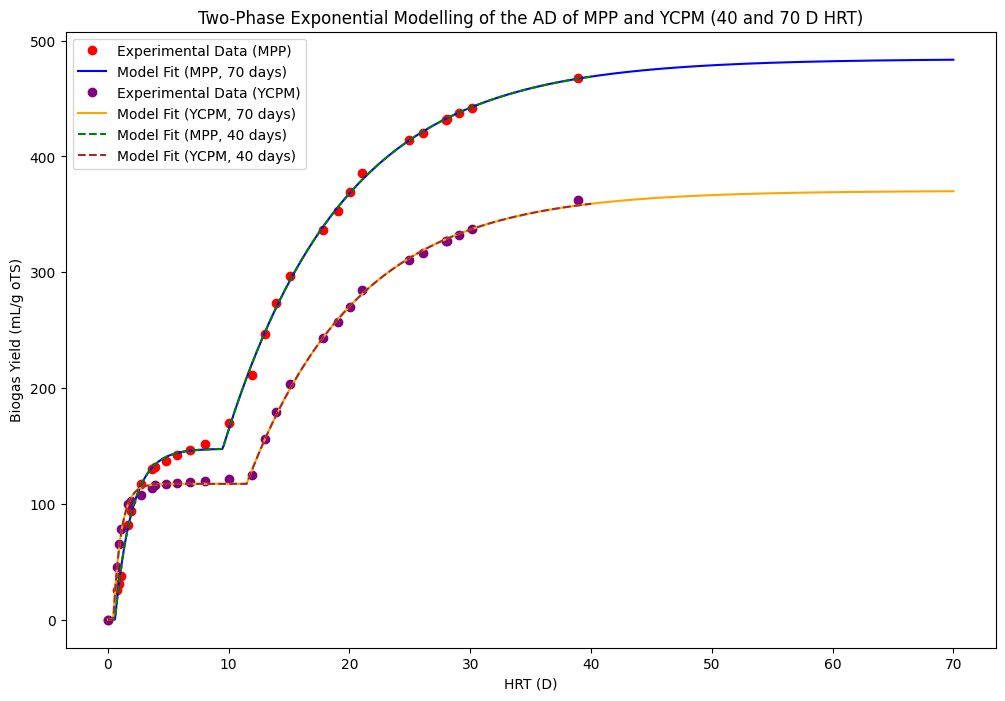

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from google.colab import drive
from sklearn.metrics import r2_score, mean_squared_error

# Mount Google Drive
drive.mount('/content/drive')

# Load the data
file_path = '/content/drive/MyDrive/SummaryofBY/DSFibrous.csv'
data = pd.read_csv(file_path)
cleaned_data = data.dropna()

# Two-phase exponential model
def two_phase_exponential(t, A1, A2, k1, k2, t_lag1, t_lag2):
    phase1 = A1 * (1 - np.exp(-k1 * (t - t_lag1))) * (t >= t_lag1)
    phase2 = A2 * (1 - np.exp(-k2 * (t - t_lag2))) * (t >= t_lag2)
    return phase1 + phase2

# Data for MPP
time_data_mpp = data['HRT (d)'].values
biogas_data_mpp = data['Biogas MPP (ml/g oTS)'].values

# Data for YCPM
time_data_ycpm = data['HRT (d)'].values
biogas_data_ycpm = data['Biogas Yield for YCPM (ml/g oTS)'].values

# Initial guesses for parameters
initial_guesses = [100, 200, 0.1, 0.05, 2, 7]

# Create a single figure and axes for the composite plot
plt.figure(figsize=(12, 8))

# --- Fit and Plot for MPP (70 days) ---
try:
    params_mpp_70, covariance_mpp_70 = curve_fit(
        two_phase_exponential,
        time_data_mpp,
        biogas_data_mpp,
        p0=initial_guesses,
        maxfev=50000
    )
    A1_fitted_mpp_70, A2_fitted_mpp_70, k1_fitted_mpp_70, k2_fitted_mpp_70, t_lag1_fitted_mpp_70, t_lag2_fitted_mpp_70 = params_mpp_70
    time_model_70 = np.linspace(0, 70, 600)
    biogas_model_mpp_70 = two_phase_exponential(
        time_model_70, *params_mpp_70
    )
    plt.plot(time_data_mpp, biogas_data_mpp, 'o', label="Experimental Data (MPP)", color='red')
    plt.plot(time_model_70, biogas_model_mpp_70, '-', label=f"Model Fit (MPP, 70 days)", color='blue')
except RuntimeError as e:
    print(f"Could not fit model for MPP (70 days): {e}")

# --- Fit and Plot for YCPM (70 days) ---
try:
    params_ycpm_70, covariance_ycpm_70 = curve_fit(
        two_phase_exponential,
        time_data_ycpm,
        biogas_data_ycpm,
        p0=initial_guesses,
        maxfev=50000
    )
    A1_fitted_ycpm_70, A2_fitted_ycpm_70, k1_fitted_ycpm_70, k2_fitted_ycpm_70, t_lag1_fitted_ycpm_70, t_lag2_fitted_ycpm_70 = params_ycpm_70
    biogas_model_ycpm_70 = two_phase_exponential(
        time_model_70, *params_ycpm_70
    )
    plt.plot(time_data_ycpm, biogas_data_ycpm, 'o', label="Experimental Data (YCPM)", color='purple')
    plt.plot(time_model_70, biogas_model_ycpm_70, '-', label=f"Model Fit (YCPM, 70 days)", color='orange')
except RuntimeError as e:
    print(f"Could not fit model for YCPM (70 days): {e}")

# --- Fit and Plot for MPP (40 days) ---
try:
    # Filter data for the first 40 days
    mask_mpp_40 = time_data_mpp <= 40
    time_data_mpp_40 = time_data_mpp[mask_mpp_40]
    biogas_data_mpp_40 = biogas_data_mpp[mask_mpp_40]

    params_mpp_40, covariance_mpp_40 = curve_fit(
        two_phase_exponential,
        time_data_mpp_40,
        biogas_data_mpp_40,
        p0=initial_guesses,
        maxfev=50000
    )
    A1_fitted_mpp_40, A2_fitted_mpp_40, k1_fitted_mpp_40, k2_fitted_mpp_40, t_lag1_fitted_mpp_40, t_lag2_fitted_mpp_40 = params_mpp_40
    time_model_40 = np.linspace(0, 40, 600)
    biogas_model_mpp_40 = two_phase_exponential(
        time_model_40, *params_mpp_40
    )
    plt.plot(time_model_40, biogas_model_mpp_40, '--', label=f"Model Fit (MPP, 40 days)", color='green')
except RuntimeError as e:
    print(f"Could not fit model for MPP (40 days): {e}")

# --- Fit and Plot for YCPM (40 days) ---
try:
    # Filter data for the first 40 days
    mask_ycpm_40 = time_data_ycpm <= 40
    time_data_ycpm_40 = time_data_ycpm[mask_ycpm_40]
    biogas_data_ycpm_40 = biogas_data_ycpm[mask_ycpm_40]

    params_ycpm_40, covariance_ycpm_40 = curve_fit(
        two_phase_exponential,
        time_data_ycpm_40,
        biogas_data_ycpm_40,
        p0=initial_guesses,
        maxfev=50000
    )
    A1_fitted_ycpm_40, A2_fitted_ycpm_40, k1_fitted_ycpm_40, k2_fitted_ycpm_40, t_lag1_fitted_ycpm_40, t_lag2_fitted_ycpm_40 = params_ycpm_40
    biogas_model_ycpm_40 = two_phase_exponential(
        time_model_40, *params_ycpm_40
    )
    plt.plot(time_model_40, biogas_model_ycpm_40, '--', label=f"Model Fit (YCPM, 40 days)", color='brown')
except RuntimeError as e:
    print(f"Could not fit model for YCPM (40 days): {e}")


# Add title and labels to the composite plot
plt.title("Two-Phase Exponential Modelling of the AD of MPP and YCPM (40 and 70 D HRT)")
plt.xlabel("HRT (D)")
plt.ylabel("Biogas Yield (mL/g oTS)")
plt.legend()
plt.grid(False)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
MPP (40 days) - R-squared: 0.9994, RMSE: 3.5481
MPP (40 days) - Fitted Parameters: A1=147.66, A2=336.56, k1=0.72, k2=0.10, t_lag1=0.58, t_lag2=9.50
YCPM (40 days) - R-squared: 0.9992, RMSE: 2.8674
YCPM (40 days) - Fitted Parameters: A1=117.32, A2=253.07, k1=1.55, k2=0.11, t_lag1=0.44, t_lag2=11.49


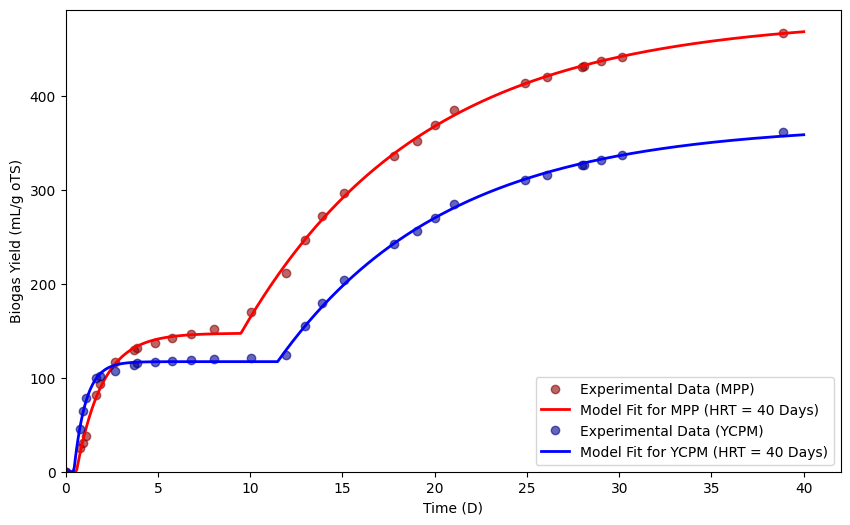

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from google.colab import drive
from sklearn.metrics import r2_score, mean_squared_error

# Mount Google Drive
drive.mount('/content/drive')

# Load the data
file_path = '/content/drive/MyDrive/SummaryofBY/DSFibrous.csv'
data = pd.read_csv(file_path)
cleaned_data = data.dropna()

# Two-phase exponential model
def two_phase_exponential(t, A1, A2, k1, k2, t_lag1, t_lag2):
    phase1 = A1 * (1 - np.exp(-k1 * (t - t_lag1))) * (t >= t_lag1)
    phase2 = A2 * (1 - np.exp(-k2 * (t - t_lag2))) * (t >= t_lag2)
    return phase1 + phase2

# Data for MPP and YCPM
time_data = data['HRT (d)'].values
biogas_data_mpp = data['Biogas MPP (ml/g oTS)'].values
biogas_data_ycpm = data['Biogas Yield for YCPM (ml/g oTS)'].values

# Filter data for the first 40 days
mask_40 = time_data <= 40
time_data_40 = time_data[mask_40]
biogas_data_mpp_40 = biogas_data_mpp[mask_40]
biogas_data_ycpm_40 = biogas_data_ycpm[mask_40]


# Initial guesses for parameters
initial_guesses = [100, 200, 0.1, 0.05, 2, 7]

# Create a single figure and axes for the composite plot
plt.figure(figsize=(10, 6)) # Consistent figure size

# --- Fit and Plot for MPP (40 days) ---
try:
    params_mpp_40, covariance_mpp_40 = curve_fit(
        two_phase_exponential,
        time_data_40,
        biogas_data_mpp_40,
        p0=initial_guesses,
        maxfev=50000
    )
    A1_fitted_mpp_40, A2_fitted_mpp_40, k1_fitted_mpp_40, k2_fitted_mpp_40, t_lag1_fitted_mpp_40, t_lag2_fitted_mpp_40 = params_mpp_40
    time_model_40 = np.linspace(0, 40, 600)
    biogas_model_mpp_40 = two_phase_exponential(
        time_model_40, *params_mpp_40
    )
    plt.plot(time_data_40, biogas_data_mpp_40, 'o', label="Experimental Data (MPP)", color='darkred', alpha=0.6)
    plt.plot(time_model_40, biogas_model_mpp_40, '-', label=f"Model Fit for MPP (HRT = 40 Days)", color='red', linewidth=2)

    # Evaluate the model for MPP (40 days)
    biogas_model_eval_mpp_40 = two_phase_exponential(
        time_data_40, *params_mpp_40
    )
    r2_mpp_40 = r2_score(biogas_data_mpp_40, biogas_model_eval_mpp_40)
    rmse_mpp_40 = np.sqrt(mean_squared_error(biogas_data_mpp_40, biogas_model_eval_mpp_40))
    print(f"MPP (40 days) - R-squared: {r2_mpp_40:.4f}, RMSE: {rmse_mpp_40:.4f}")
    print(f"MPP (40 days) - Fitted Parameters: A1={A1_fitted_mpp_40:.2f}, A2={A2_fitted_mpp_40:.2f}, k1={k1_fitted_mpp_40:.2f}, k2={k2_fitted_mpp_40:.2f}, t_lag1={t_lag1_fitted_mpp_40:.2f}, t_lag2={t_lag2_fitted_mpp_40:.2f}")


except RuntimeError as e:
    print(f"Could not fit model for MPP (40 days): {e}")

# --- Fit and Plot for YCPM (40 days) ---
try:
    params_ycpm_40, covariance_ycpm_40 = curve_fit(
        two_phase_exponential,
        time_data_40,
        biogas_data_ycpm_40,
        p0=initial_guesses,
        maxfev=50000
    )
    A1_fitted_ycpm_40, A2_fitted_ycpm_40, k1_fitted_ycpm_40, k2_fitted_ycpm_40, t_lag1_fitted_ycpm_40, t_lag2_fitted_ycpm_40 = params_ycpm_40
    biogas_model_ycpm_40 = two_phase_exponential(
        time_model_40, *params_ycpm_40
    )
    plt.plot(time_data_40, biogas_data_ycpm_40, 'o', label="Experimental Data (YCPM)", color='darkblue', alpha=0.6)
    plt.plot(time_model_40, biogas_model_ycpm_40, '-', label=f"Model Fit for YCPM (HRT = 40 Days)", color='blue', linewidth=2)

    # Evaluate the model for YCPM (40 days)
    biogas_model_eval_ycpm_40 = two_phase_exponential(
        time_data_40, *params_ycpm_40
    )
    r2_ycpm_40 = r2_score(biogas_data_ycpm_40, biogas_model_eval_ycpm_40)
    rmse_ycpm_40 = np.sqrt(mean_squared_error(biogas_data_ycpm_40, biogas_model_eval_ycpm_40))
    print(f"YCPM (40 days) - R-squared: {r2_ycpm_40:.4f}, RMSE: {rmse_ycpm_40:.4f}")
    print(f"YCPM (40 days) - Fitted Parameters: A1={A1_fitted_ycpm_40:.2f}, A2={A2_fitted_ycpm_40:.2f}, k1={k1_fitted_ycpm_40:.2f}, k2={k2_fitted_ycpm_40:.2f}, t_lag1={t_lag1_fitted_ycpm_40:.2f}, t_lag2={t_lag2_fitted_ycpm_40:.2f}")

except RuntimeError as e:
    print(f"Could not fit model for YCPM (40 days): {e}")


# Add title and labels to the composite plot
# Removed plt.title("Two-Phase Exponential Modelling for Biogas Yield of MPP and YCPM (40 days HRT)")
plt.xlabel("Time (D)")
plt.ylabel("Biogas Yield (mL/g oTS)")
plt.legend(loc='lower right')
plt.grid(False)
plt.xlim(0) # Set x-axis to start from origin
plt.ylim(0) # Set y-axis to start from origin

# Save plots as TIFF BEFORE showing
plt.savefig('MPP_YCPM_two_phase_40days.tif', dpi=600, format='tif') # Save the figure as a high-quality TIF file
plt.show()


In [ ]:
from google.colab import files

# Download the saved TIFF file
files.download('MPP_YCPM_two_phase_40days.tif')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>